# Missing data and aggregations

In [157]:
import pandas as pd
import numpy as np

np.random.seed(1337)

size = 8

random_matrix = np.random.randint(1, 10, (size, size))
print(f"{random_matrix = }")
print(f"{random_matrix.size = }")

index = np.random.choice(
    random_matrix.size, 10, replace=False
)  # array of randomly picked values from random_matrix, unique because replace = False
print(f"{index = }")

random_matrix = (
    random_matrix * 1.0
)  # type convert to float by multiplying by 1.0 in order to allow None values (nan is considered a float)

# random_matrix[5,3] = 999 # value of row 5, col 3 = 999
random_matrix.ravel()[
    index
] = None  # flattens 2d array to 1d to work with 1d array "index"

random_matrix # now has random missing data

random_matrix = array([[8, 9, 8, 8, 3, 3, 5, 9],
       [7, 7, 8, 9, 2, 7, 7, 3],
       [3, 9, 2, 8, 4, 2, 4, 4],
       [5, 9, 9, 8, 5, 2, 7, 5],
       [5, 3, 6, 8, 5, 3, 4, 3],
       [5, 9, 7, 4, 9, 9, 8, 5],
       [4, 3, 2, 3, 1, 4, 9, 3],
       [2, 1, 2, 5, 3, 1, 1, 8]])
random_matrix.size = 64
index = array([28, 42, 17, 49, 53, 31, 35,  2, 13, 62])


array([[ 8.,  9., nan,  8.,  3.,  3.,  5.,  9.],
       [ 7.,  7.,  8.,  9.,  2., nan,  7.,  3.],
       [ 3., nan,  2.,  8.,  4.,  2.,  4.,  4.],
       [ 5.,  9.,  9.,  8., nan,  2.,  7., nan],
       [ 5.,  3.,  6., nan,  5.,  3.,  4.,  3.],
       [ 5.,  9., nan,  4.,  9.,  9.,  8.,  5.],
       [ 4., nan,  2.,  3.,  1., nan,  9.,  3.],
       [ 2.,  1.,  2.,  5.,  3.,  1., nan,  8.]])

In [158]:
scores = pd.DataFrame(
    random_matrix,
    index=[f"Player {i}" for i in range(1, size + 1)],
    columns=[f"Round {i}" for i in range(1, size + 1)],
)  # create scores DataFrame of data array where NaN represents players not participating in a specific round

scores


,Round 1,Round 2,Round 3,Round 4,Round 5,Round 6,Round 7,Round 8
Player 1,8.0,9.0,NaN,8.0,3.0,3.0,5.0,9.0
Player 2,7.0,7.0,8.0,9.0,2.0,NaN,7.0,3.0
Player 3,3.0,NaN,2.0,8.0,4.0,2.0,4.0,4.0
Player 4,5.0,9.0,9.0,8.0,NaN,2.0,7.0,NaN
Player 5,5.0,3.0,6.0,NaN,5.0,3.0,4.0,3.0
Player 6,5.0,9.0,NaN,4.0,9.0,9.0,8.0,5.0
Player 7,4.0,NaN,2.0,3.0,1.0,NaN,9.0,3.0
Player 8,2.0,1.0,2.0,5.0,3.0,1.0,NaN,8.0


---
## Working with missing data



In [159]:
scores.isnull()
# with large amounts of data, if the specific rows are not highly relevant, it is possible to drop none values, but rarely best option
# otherwise an attempt to calculate an estimate of the missing data can be used
# for example: using a machine learning algorithm, with the help of a domain expert, using median, or averages

,Round 1,Round 2,Round 3,Round 4,Round 5,Round 6,Round 7,Round 8
Player 1,False,False,True,False,False,False,False,False
Player 2,False,False,False,False,False,True,False,False
Player 3,False,True,False,False,False,False,False,False
Player 4,False,False,False,False,True,False,False,True
Player 5,False,False,False,True,False,False,False,False
Player 6,False,False,True,False,False,False,False,False
Player 7,False,True,False,False,False,True,False,False
Player 8,False,False,False,False,False,False,True,False


In [160]:
scores.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, Player 1 to Player 8
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Round 1  8 non-null      float64
 1   Round 2  6 non-null      float64
 2   Round 3  6 non-null      float64
 3   Round 4  7 non-null      float64
 4   Round 5  7 non-null      float64
 5   Round 6  6 non-null      float64
 6   Round 7  7 non-null      float64
 7   Round 8  7 non-null      float64
dtypes: float64(8)
memory usage: 576.0+ bytes


In [161]:
scores.loc["Player 8"]["Round 7"] = 4
scores.dropna() # drops all rows containing nan (defaults to rows)

,Round 1,Round 2,Round 3,Round 4,Round 5,Round 6,Round 7,Round 8
Player 8,2.0,1.0,2.0,5.0,3.0,1.0,4.0,8.0


In [162]:
scores.dropna(axis = "columns") # drops all columns containing nan

,Round 1,Round 7
Player 1,8.0,5.0
Player 2,7.0,7.0
Player 3,3.0,4.0
Player 4,5.0,7.0
Player 5,5.0,4.0
Player 6,5.0,8.0
Player 7,4.0,9.0
Player 8,2.0,4.0


In [163]:
scores.fillna(0, inplace = True) # replaces nan with 0, mutates scores because of inplace = True
scores

,Round 1,Round 2,Round 3,Round 4,Round 5,Round 6,Round 7,Round 8
Player 1,8.0,9.0,0.0,8.0,3.0,3.0,5.0,9.0
Player 2,7.0,7.0,8.0,9.0,2.0,0.0,7.0,3.0
Player 3,3.0,0.0,2.0,8.0,4.0,2.0,4.0,4.0
Player 4,5.0,9.0,9.0,8.0,0.0,2.0,7.0,0.0
Player 5,5.0,3.0,6.0,0.0,5.0,3.0,4.0,3.0
Player 6,5.0,9.0,0.0,4.0,9.0,9.0,8.0,5.0
Player 7,4.0,0.0,2.0,3.0,1.0,0.0,9.0,3.0
Player 8,2.0,1.0,2.0,5.0,3.0,1.0,4.0,8.0


---
## Missing data - strategy

In [164]:
import seaborn as sns

titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [165]:
# DataFrame contains pandas Series objects for each column:
type(titanic["survived"]).__name__

'Series'

In [166]:
titanic["survived"].value_counts()

0    549
1    342
Name: survived, dtype: int64

In [167]:
titanic.info() # good place to start data exploration

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [168]:
# category is a set of predetermined values to be chosen from ie:
titanic["class"].value_counts() # first, second, third

Third     491
First     216
Second    184
Name: class, dtype: int64

In [169]:
titanic.describe() # numerical datatypes

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [170]:
titanic.isnull().head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [171]:
nans = titanic.isnull().sum() # all columns summarized
nans

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

<AxesSubplot: xlabel='age', ylabel='Count'>

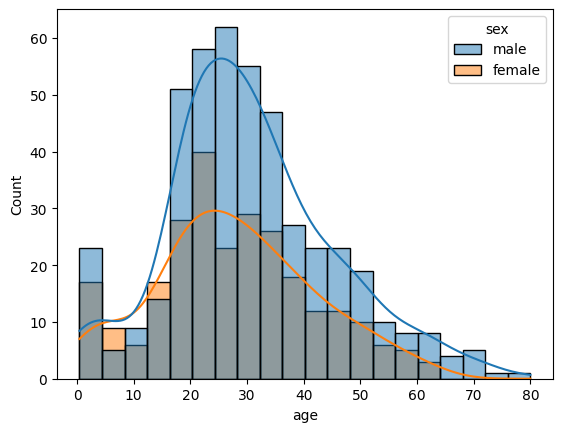

In [172]:
# looking at age
sns.histplot(data = titanic, x = "age", hue = "sex", kde = True)

In [173]:
# case
# a historian (domain expert) advices us to use median age of corresponding gender to fill in missing ages

titanic["sex"] == "male" # Length = 891 -> no missing values on gender

0       True
1      False
2      False
3      False
4       True
       ...  
886     True
887    False
888    False
889     True
890     True
Name: sex, Length: 891, dtype: bool

In [174]:
median_age_male = titanic[titanic["sex"] == "male"]["age"].median() # filter on sex == male, get their age, and the median of that sum
median_age_male

29.0

In [175]:
median_age_female = titanic[titanic["sex"] == "female"]["age"].median()
median_age_female

27.0

In [176]:
# NOTE: loc syntax: [rows matching condition, value of Series column in row]
titanic.loc[titanic["sex"] == "male", "age"] = titanic.loc[titanic["sex"] == "male", "age"].fillna(median_age_male)

titanic.loc[titanic["age"] == 29, "sex"].value_counts()

male      137
female      7
Name: sex, dtype: int64

In [177]:
titanic.loc[titanic["age"].isnull(), "sex"].value_counts() # all rows where age == nan, and the amount of each unique sex (only females)

female    53
Name: sex, dtype: int64

In [178]:
titanic["age"] = titanic["age"].fillna(median_age_female) # because all remaining nan values are now females, as all male values have been filled
titanic[titanic["age"].isnull(), "sex"].value_counts()

InvalidIndexError: (0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: age, Length: 891, dtype: bool, 'sex')

In [ ]:
# TODO: why doesn's inplace work here?
# titanic.loc[titanic["sex"] == "male", "age"].fillna(median_age_male, inplace = True)
# titanic.loc[titanic["sex"] == "female", "age"].fillna(median_age_female, inplace = True)
# titanic

<AxesSubplot: xlabel='age', ylabel='Count'>

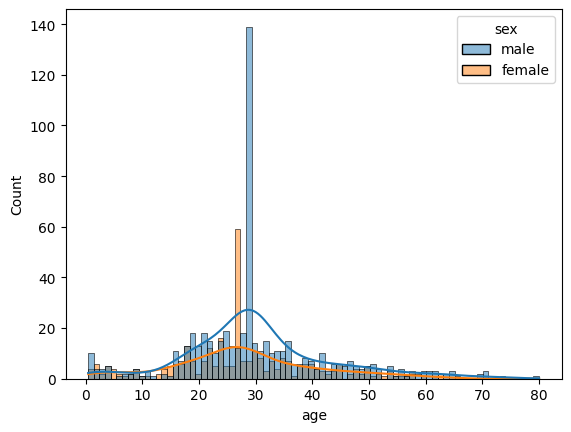

In [ ]:
# looking at age
sns.histplot(data = titanic, x = "age", hue = "sex", kde = True, bins = 80) # filled as the historian wanted